In [266]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [267]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Analysis

In [270]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

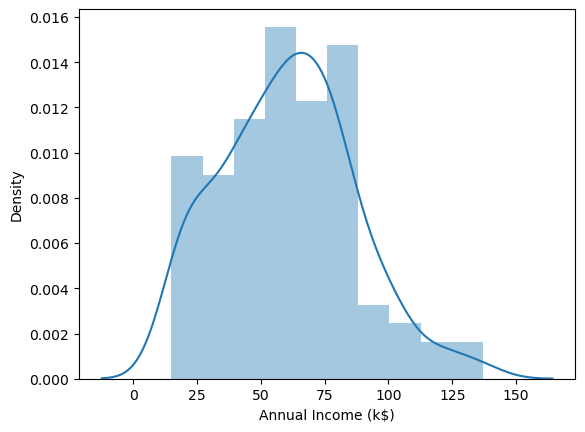

In [271]:
sns.distplot(df['Annual Income (k$)'])


In [272]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

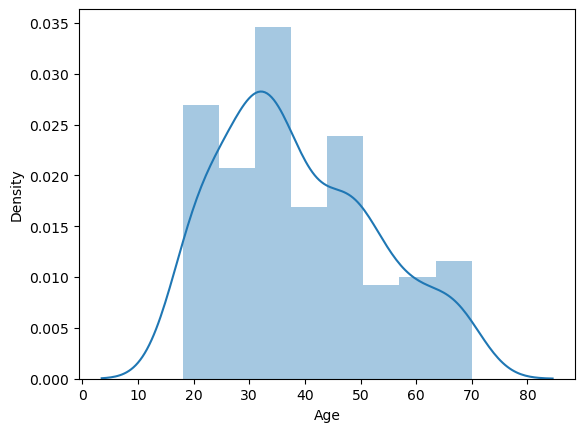

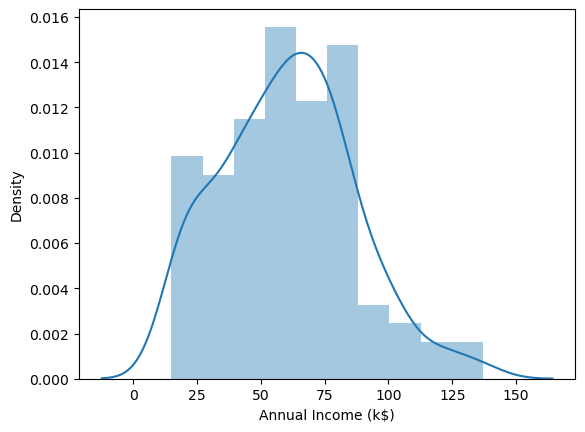

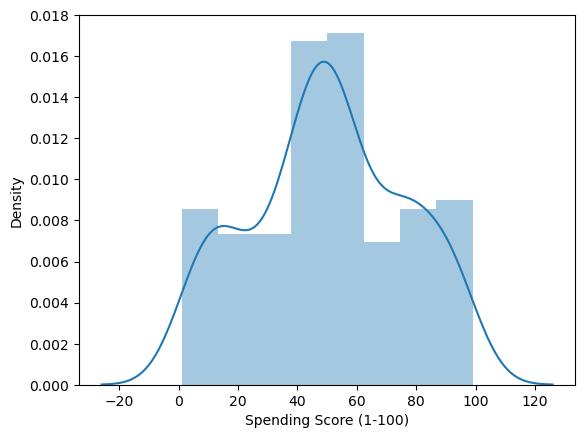

In [273]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns :
    plt.figure()
    sns.distplot(df[i])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

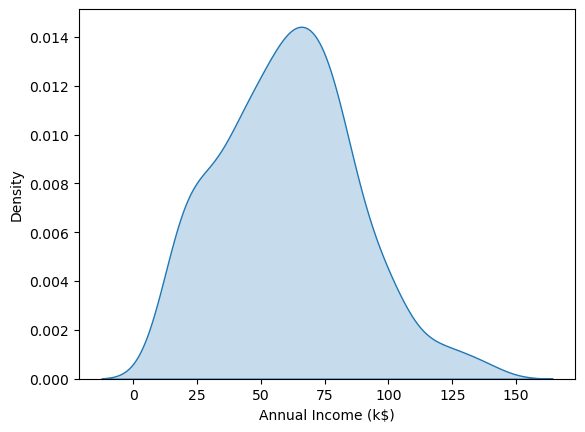

In [274]:
sns.kdeplot(df['Annual Income (k$)'] , shade = True )


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

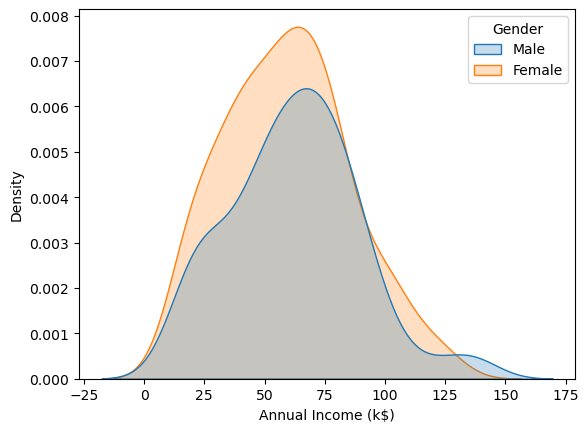

In [275]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

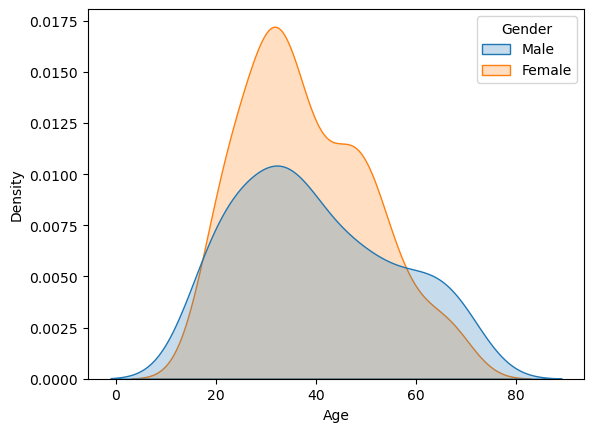

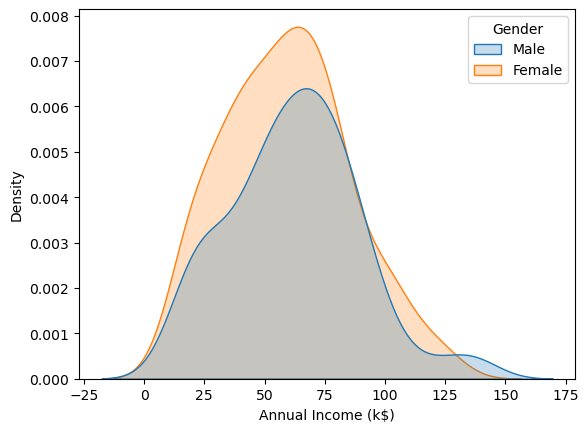

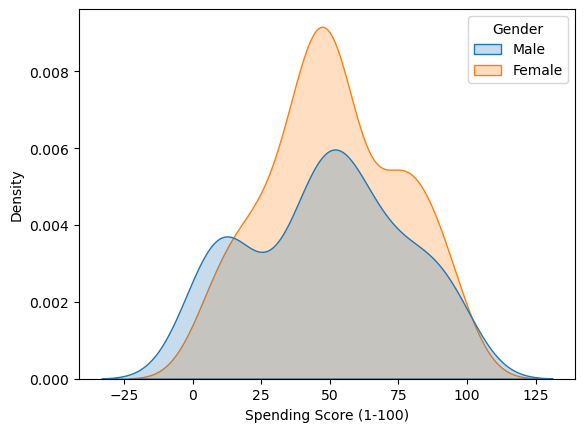

In [276]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True) 
    plt.show()

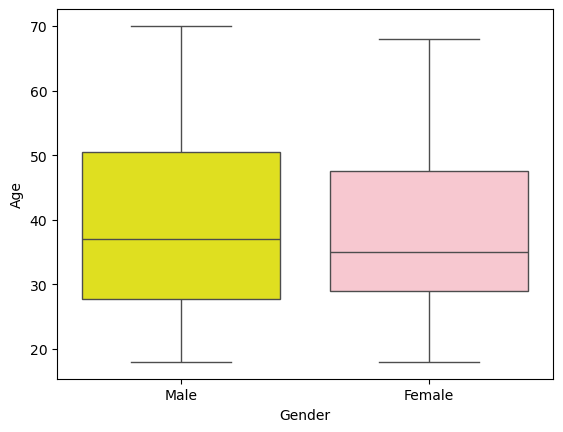

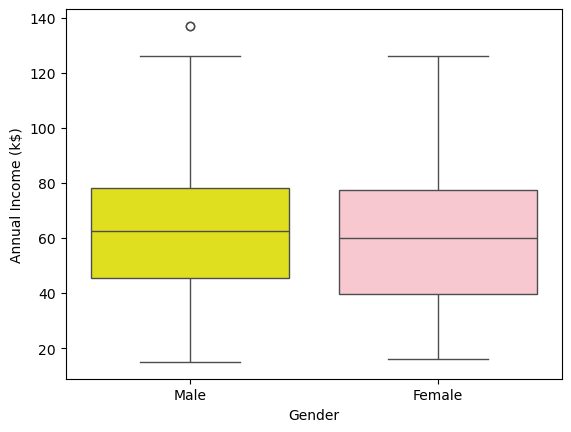

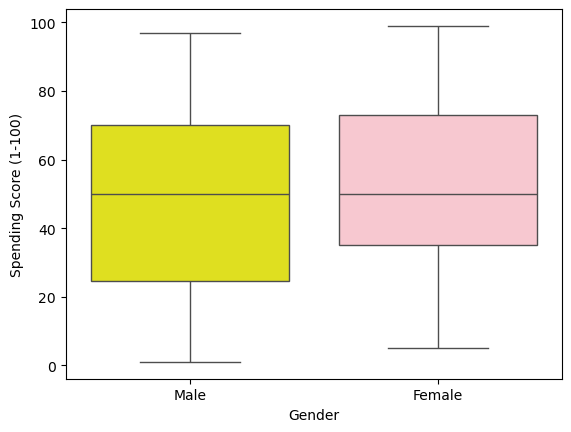

In [277]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i, palette={"Male": "yellow", "Female": "pink"}) 
    plt.show()

In [278]:
df['Gender'].value_counts(normalize=True)
# To see percentage 

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

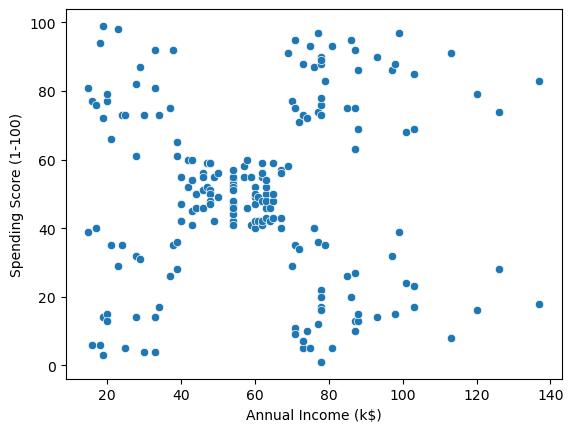

In [280]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' ) ;


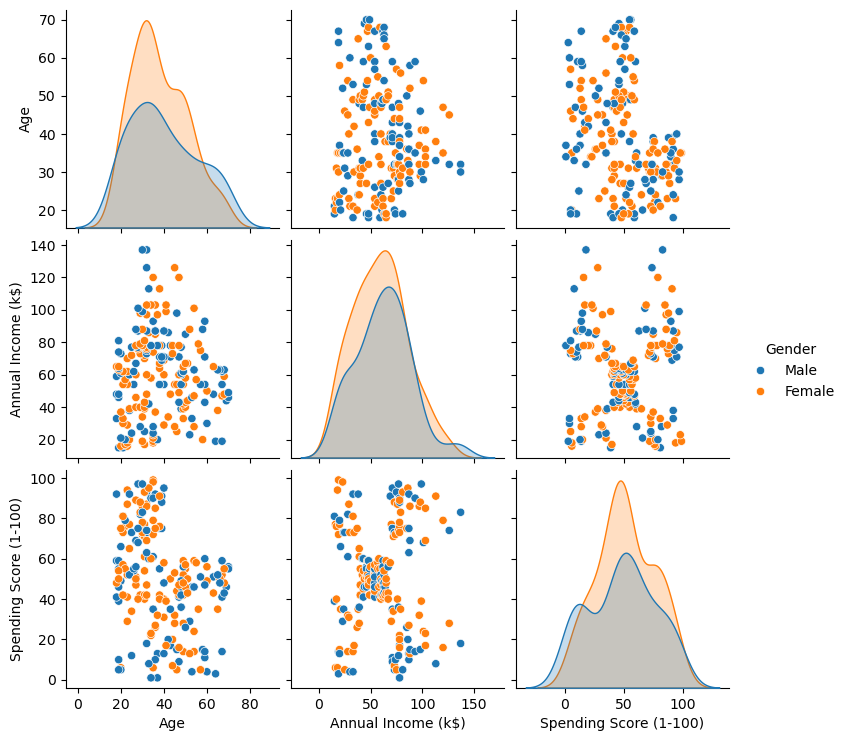

In [281]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [282]:
df.groupby('Gender')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [283]:
df.select_dtypes(include=['number']).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

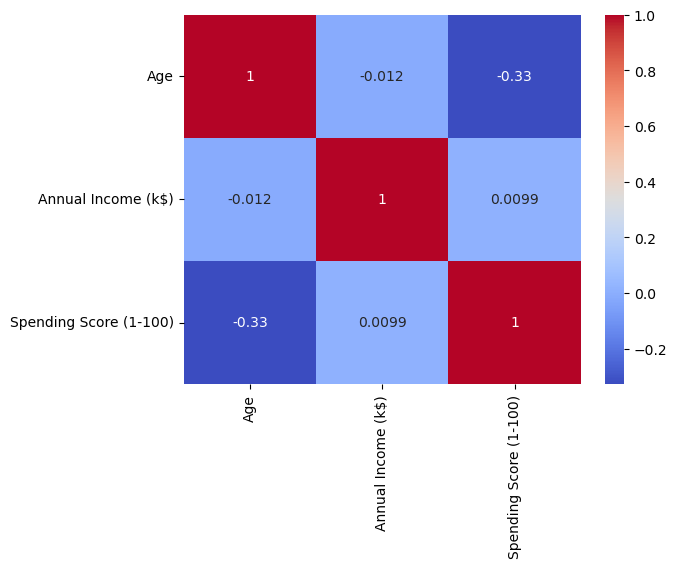

In [284]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True,cmap='coolwarm') 

## Clustering - Univariate, Bivariate, Multivariate

In [286]:
clustering1 = KMeans(n_clusters=3)



In [287]:
clustering1.fit(df[['Annual Income (k$)']])


KMeans(n_clusters=3)

In [288]:
clustering1.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [289]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [290]:
df['Income Cluster'].value_counts()


Income Cluster
0    92
1    86
2    22
Name: count, dtype: int64

In [291]:
clustering1.inertia_


25341.285871863223

In [292]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [293]:
intertia_scores


[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 15460.429512270888,
 8717.458097165993,
 5081.484660267269,
 4265.950427350428,
 3056.2911255411254,
 2549.621572871573,
 1859.0235042735044]

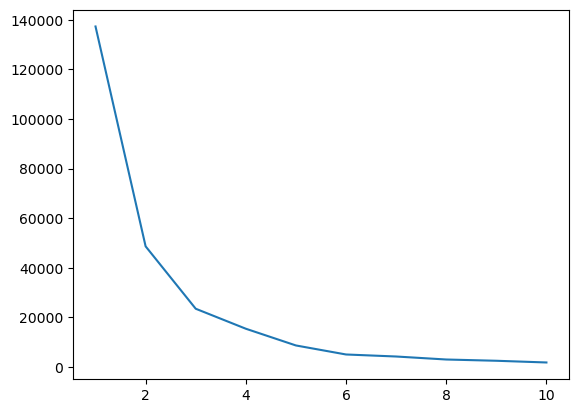

In [294]:
plt.plot(range(1,11),intertia_scores) ;


# 📌 Elbow Method Explanation

The **Elbow Method** is used to determine the optimal number of clusters (**K**) for **K-Means Clustering**.  
It does this by plotting the **inertia** (within-cluster sum of squared errors - **SSE**) against different values of **K**.

1. **X-axis**: Number of clusters (**K**) ranging from **1 to 10**.  
2. **Y-axis**: **Inertia** (sum of squared distances from points to their assigned cluster center).  
3. The curve **steeply drops** from **K=1 to K=3** and then starts **flattening out**.  
4. The **"elbow point"** is where the **SSE stops decreasing sharply** and starts to level off.  

## 🎯 Optimal K?
- The **elbow point is around K=3 or K=4**, where the curve **bends and starts flattening**.  
- After **K=4**, adding more clusters **does not significantly reduce inertia**, meaning additional clusters **don’t provide much better separation**.  
- So, the best **K is likely 3 or 4**.  



In [296]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [297]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.065217,71.804348,49.880435
1,40.023256,36.348837,50.081395
2,37.545455,108.181818,52.000000


## Bivariate Clustering

In [299]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


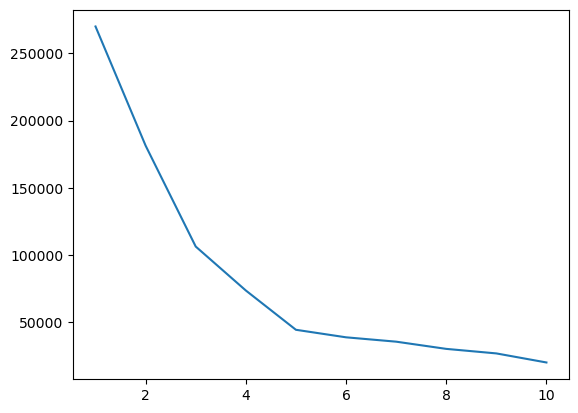

In [300]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

### K should be 5 
#### (n_clusters=5)

In [347]:
clustering2.cluster_centers_


array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [343]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

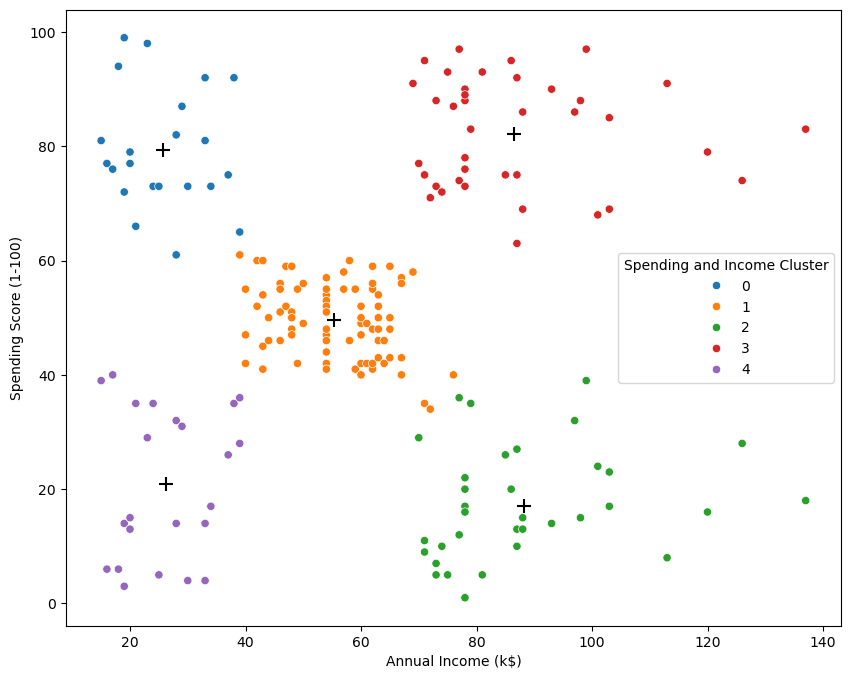

In [349]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='+')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')


#### CLUSTER 4 WILL BE A TARGET CLUSTER BECAUSE THAT WILL BE GOING TO BRING THE MOST MONEY 

In [351]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])


Gender,Female,Male
Spending and Income Cluster,,
0,13,9
1,48,33
2,16,19
3,21,18
4,14,9


In [353]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.457143,0.542857
3,0.538462,0.461538
4,0.608696,0.391304


In [359]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


#  Customer Segmentation Analysis

## Clustering Interpretation

### 1️⃣ Understanding the Cluster Centers
- The **centers** (or centroids) in clustering represent the "average" or central point of each cluster.
- Each row in the table represents a cluster, with the values showing the mean **Annual Income** and **Spending Score** for each group.

### 2️⃣ Cluster Summary Table 
| Cluster | Age (Avg) | Annual Income (k$) | Spending Score (1-100) | Interpretation |
|---------|----------|--------------------|------------------------|----------------|
| **0 (Blue)**  | 25.27  | 25.72  | 79.36  | Young, low income, **high spending** |
| **1 (Orange)** | 42.71  | 55.29  | 49.51  | Middle-aged, **moderate income and spending** |
| **2 (Green)**  | 41.11  | 88.20  | 17.11  | Older, **high income, low spending** |
| **3 (Red)**  | 32.69  | 86.53  | 82.12  | Mid-age, **high income, high spending** |
| **4 (Purple)** | 45.21  | 26.30  | 20.91  | Older, **low income, low spending** |

### 3️⃣ Scatterplot Interpretation 
- The scatterplot visualizes clusters based on **Annual Income** (x-axis) and **Spending Score** (y-axis).
- Each dot represents a customer, colored based on their assigned cluster.
- The **black cross marks** indicate the cluster centers, showing the typical spending and income patterns for each group.

### 4️⃣ Business Insights 
- **High-income, high-spending customers (Red Cluster 3)** → Ideal for premium offers.
- **Low-income, high-spending customers (Blue Cluster 0)** → May be risky in terms of credit.
- **High-income, low-spending customers (Green Cluster 2)** → Potential for targeted marketing to increase spending.
- **Low-income, low-spending customers (Purple Cluster 4)** → Likely cost-sensitive customers.
- **Middle-income, average spending customers (Orange Cluster 1)** → General audience.



## Mulivariate clustering 


In [369]:
from sklearn.preprocessing import StandardScaler # will allow us to scale the data

In [371]:
scale = StandardScaler()

In [373]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [377]:
dff = pd.get_dummies(df, drop_first=True).astype(int) # 2 columns are not needed.
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,1,4,0
3,23,16,77,1,0,0
4,31,17,40,1,4,0


In [380]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [382]:
dff = scale.fit_transform(dff)

# StandardScaler Transformation

## Why do we need to scale the data?
- The original dataset had **Age, Income, Spending Score, and Gender**.
- These values were in **different units** (Age in years, Income in thousands, Spending Score from 1-100, etc.).
- Some numbers were **much bigger** than others, which can make it hard for machine learning models to work properly.
- So, we used **StandardScaler** to **normalize** them, meaning:
  - We converted all values to a **standard scale** (mean = 0, standard deviation = 1).
  - This helps in clustering and other ML tasks.

## What do the numbers mean?
Now, instead of the actual values, we see **how far each value is from the average** in terms of standard deviation.
- **Negative numbers** → Below average.
- **Positive numbers** → Above average.
- **Closer to 0** → Close to the average.

## Example:
Let’s look at **Row 0**:
- **Age (-1.42)** → This person’s age is **below average**.
- **Income (-1.73)** → They have a **lower-than-average income**.
- **Spending Score (-0.43)** → Their spending score is **slightly below average**.
- **Gender (1.12)** → This person is likely **Male**, because the gender column was scaled too.

In [384]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


## 📌 Understanding the Standard Scaled Data in K-Means Clustering


### **Standard Scaling (Standardization)**
To bring all features to the same scale, we use `StandardScaler`:
- **Formula used**:
  \[
  Z = \frac{X - \text{mean}(X)}{\text{std}(X)}
  \]
- This transforms the data so that:
  - Mean = **0**
  - Standard Deviation = **1**

---

### **Interpreting the Transformed Data**

| **Row** | **Age (Scaled)** | **Income (Scaled)** | **Spending Score (Scaled)** | **Gender (Scaled)** |
|---------|-----------------|--------------------|----------------------|----------------|
| **0** | -1.424569  | -1.738999  | -0.434801  | 1.128152  |
| **1** | -1.281035  | -1.738999  | 1.195704  | 1.128152  |
| **2** | -1.352802  | -1.700830  | -1.715913  | -0.886405  |
| **3** | -1.137502  | -1.700830  | 1.040418  | -0.886405  |
| **4** | -0.563369  | -1.662660  | -0.395980  | -0.886405  |

**Interpretation:**
- **Negative values** → Below average.
- **Positive values** → Above average.
- **Values close to 0** → Near the average.

✅ **Example (Row 0)**:
- **Age = -1.42** → Much younger than average.
- **Income = -1.73** → Much lower than average.
- **Spending Score = -0.43** → Slightly below average.
- **Gender = 1.12** → Male (after one-hot encoding and scaling).


### ** Next Step: Finding the Best Number of Clusters (K)**


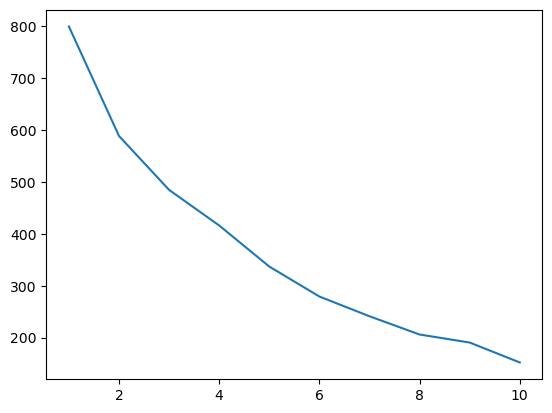

In [386]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [388]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,3
196,Female,45,126,28,2,2
197,Male,32,126,74,2,3
198,Male,32,137,18,2,2
